In [1]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
from IPython.display import HTML

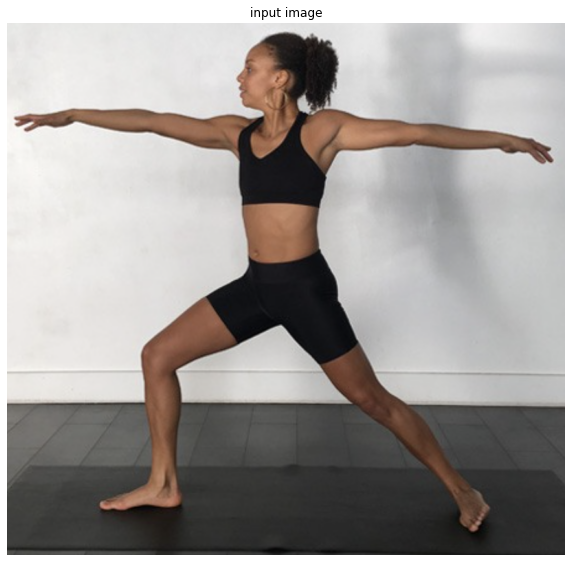

Which aasan is being performed in the image?
1. Padmasan
2. Lotus Pose
3. Vrikshasan or T Pose
4. Virabhadrasan or Warrior-II Pose
5. T Pose
6. Trikonasan or Triangle Pose
7. Adho Mukhasana or Down Dog Pose
8. Bhujangasana - 1 (right faced)
9. Bhujangasana - 2 (left faced)


4


In [13]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils

image  = cv2.imread('/Users/pradxn/Desktop/1.png')
plt.figure(figsize = [10,10])
plt.title("input image");plt.axis('off');plt.imshow(image[:,:,::-1]);plt.show()

choice = int(input("Which aasan is being performed in the image?\n1. Padmasan\n2. Lotus Pose\n3. Vrikshasan or T Pose\n4. Virabhadrasan or Warrior-II Pose\n5. T Pose\n6. Trikonasan or Triangle Pose\n7. Adho Mukhasana or Down Dog Pose\n8. Bhujangasana - 1 (right faced)\n9. Bhujangasana - 2 (left faced)\n\n\n"))

In [14]:
results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

if results.pose_landmarks:
    for i in range(33): #range is of 33 key-points 
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.42304810881614685
y: 0.10028159618377686
z: -0.2300070971250534
visibility: 0.9999496936798096

LEFT_EYE_INNER:
x: 0.4403500258922577
y: 0.0844336450099945
z: -0.24202960729599
visibility: 0.9997885823249817

LEFT_EYE:
x: 0.44479310512542725
y: 0.0854051411151886
z: -0.24252374470233917
visibility: 0.9998077750205994

LEFT_EYE_OUTER:
x: 0.44863080978393555
y: 0.08609619736671448
z: -0.2423253059387207
visibility: 0.9997801184654236

RIGHT_EYE_INNER:
x: 0.43825003504753113
y: 0.08298131823539734
z: -0.2031751424074173
visibility: 0.9998369216918945

RIGHT_EYE:
x: 0.4409099519252777
y: 0.08334070444107056
z: -0.2039126753807068
visibility: 0.9998965263366699

RIGHT_EYE_OUTER:
x: 0.4433155953884125
y: 0.08356520533561707
z: -0.2042233943939209
visibility: 0.9998911619186401

LEFT_EAR:
x: 0.48072853684425354
y: 0.10001027584075928
z: -0.2364724576473236
visibility: 0.9998775720596313

RIGHT_EAR:
x: 0.47097307443618774
y: 0.09905359148979187
z: -0.05661211907863617
visibility: 0.

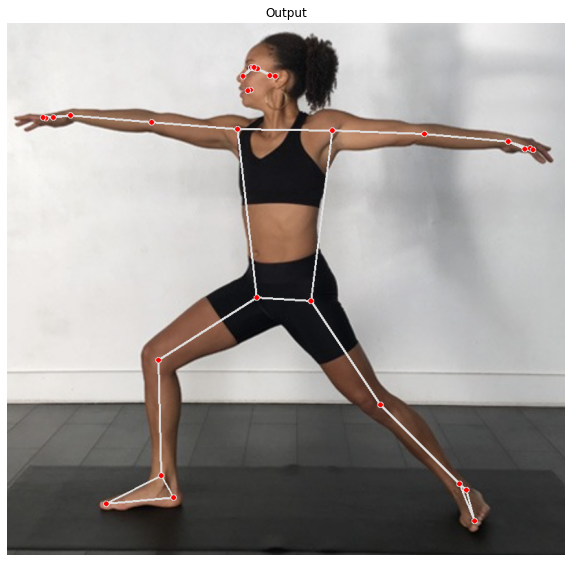

In [15]:
img_copy = image.copy()

if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    fig = plt.figure(figsize = [10, 10])
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

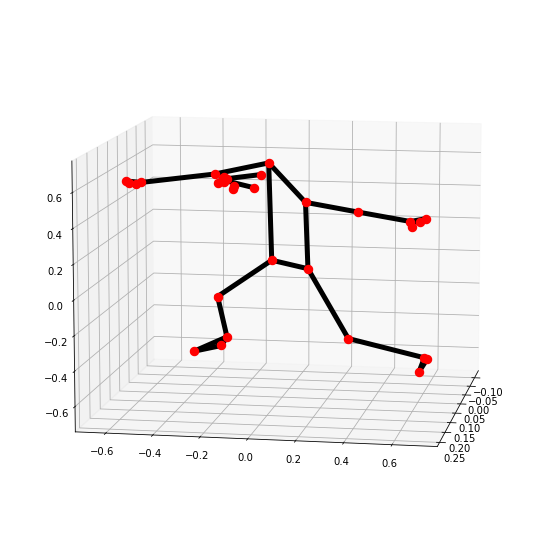

In [16]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [17]:
def detectPose(image, pose, display=True):
    output_image = image.copy()
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(imageRGB)
    height, width, _ = image.shape
    landmarks = []
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        for landmark in results.pose_landmarks.landmark:    
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    if display:
        plt.figure(figsize=[25,25])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    else:
        return output_image, landmarks

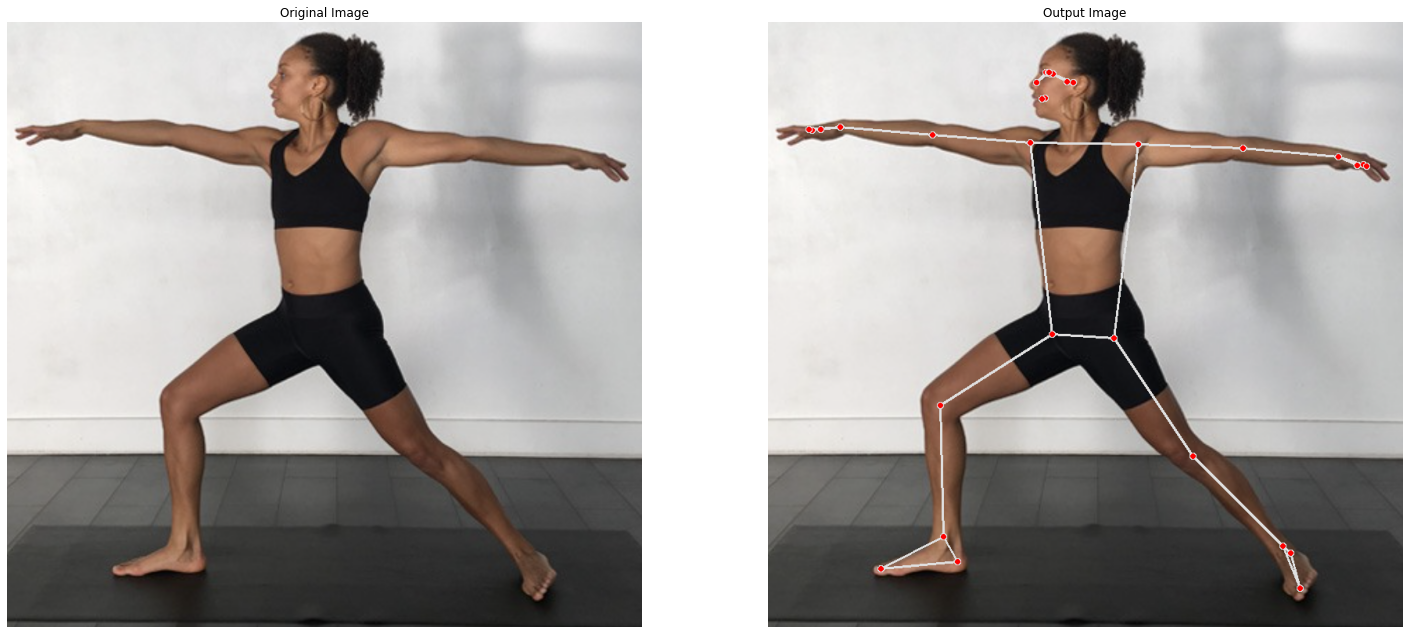

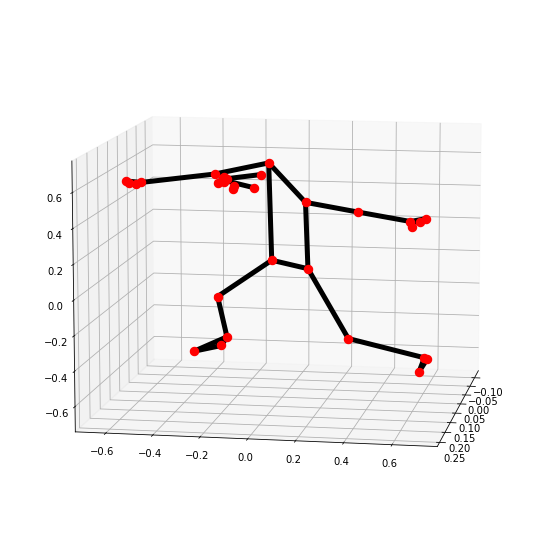

In [18]:
image
detectPose(image, pose, display=True)

In [19]:
def calculateAngle(landmark1, landmark2, landmark3):
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    if angle < 0:
        angle += 360
    return angle

angle = calculateAngle((112, 231, 5), (132, 253, 20), (17, 1, 320)) #random angles


print(f'The calculated angle is {angle}')

The calculated angle is 17.744141550308925


In [20]:
def classifyPose(landmarks, output_image, display=False):

    label = 'Unknown Pose'
    color = (0, 0, 255)
    
    # angle between the left shoulder, elbow and wrist points. 
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    # angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
    # angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])

    # angle between the right elbow, shoulder and elbow points. 
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])

    # angle between the left hip, knee and ankle points. 
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    # angle between the right hip, knee and ankle points 
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    

#----------Padmasan 1 pose (with straight arms)----------
    if choice == 1:
        # arms
        if left_elbow_angle > 140 and left_elbow_angle < 165 and right_elbow_angle > 220 and right_elbow_angle < 225:
        # shoulders
            if left_shoulder_angle > 35 and left_shoulder_angle < 40 and right_shoulder_angle > 35 and right_shoulder_angle < 40:
        # knees
                if left_knee_angle > 330 and left_knee_angle < 350 and right_knee_angle > 9 and right_knee_angle < 20:
                    label = 'Padmasan Pose'
                else:
                    print("\nPositioning of knees is wrong. please perform pose again\n")
            else:
                print("\nPositioning of shoulder is wrong. please perform pose again\n")
        else:
            print("\nPositioning of arms is wrong. please perform pose again\n")
                    
                    
#----------Lotus Pose or Padmasan 2 pose (with praying arms)----------                    
    if choice == 2:
        # arms
        if left_elbow_angle > 305 and left_elbow_angle < 330 and right_elbow_angle > 30 and right_elbow_angle < 60:
        # shoulders
            if left_shoulder_angle > 9 and left_shoulder_angle < 37 and right_shoulder_angle > 15 and right_shoulder_angle < 35:
        # knees
                if left_knee_angle > 330 and left_knee_angle < 350 and right_knee_angle > 15 and right_knee_angle < 25:
                    label = 'Lotus Pose'
                else:
                    print("\nPositioning of knees is wrong. please perform pose again\n")
            else:
                print("\nPositioning of shoulder is wrong. please perform pose again\n")
        else:
            print("\nPositioning of arms is wrong. please perform pose again\n")
    
    
#----------Vrikshasan----------
    if choice == 3:
        #if both arms are straight
        if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
            # add else statement
        #shoulder angles
            if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:
        # check if one leg is straight
                if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
        # check if the other leg is bended at the required angle.
                    if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45:
                        label = 'Vrikshanan or T Pose'
                else:
                    print("\nPositioning of knees is wrong. please perform pose again\n")
            else:
                print("\nPositioning of shoulder is wrong. please perform pose again\n")
        else:
            print("\nPositioning of arms is wrong. please perform pose again\n")

                    
#----------Virabhadrasan----------
    if choice == 4:
        #if both arms are straight
        if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
            # add else statement
        #shoulder angles
            if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:
        # check if one leg is straight.
                if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
        # check if the other leg is bended at the required angle.
                    if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:
                        label = 'Virabhadrasan or Warrior-II Pose'
                else:
                    print("\nPositioning of knees is wrong. please perform pose again\n")
            else:
                print("\nPositioning of shoulder is wrong. please perform pose again\n")
        else:
            print("\nPositioning of arms is wrong. please perform pose again\n")
                   
                
#----------T Pose----------
    if choice == 5:
        #if both arms are straight
        if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
            # add else statement
        #shoulder angles
            if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:
        # check if legs are straight.
                if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:
                    label = 'T Pose'
                else:
                    print("\nPositioning of knees is wrong. please perform pose again\n")
            else:
                print("\nPositioning of shoulder is wrong. please perform pose again\n")
        else:
            print("\nPositioning of arms is wrong. please perform pose again\n")
                    
                    
#----------Trikonasana----------
    if choice == 6:
        # arms
        if left_elbow_angle > 155 and left_elbow_angle < 190 and right_elbow_angle > 180 and right_elbow_angle < 190:
        # shoulders
            if left_shoulder_angle > 85 and left_shoulder_angle < 125 and right_shoulder_angle > 87 and right_shoulder_angle < 125:
        # knees
                if left_knee_angle > 175 and left_knee_angle < 190 and right_knee_angle > 175 and right_knee_angle < 195:
                    label = 'Trikonasan or Triangle Pose'
                else:
                    print("\nPositioning of knees is wrong. please perform pose again\n")
            else:
                print("\nPositioning of shoulder is wrong. please perform pose again\n")
        else:
            print("\nPositioning of arms is wrong. please perform pose again\n")
                    
                    
#----------Adho Mukhasana or Down Dog Pose----------
    if choice == 7:
        # arms
        if left_elbow_angle > 160 and left_elbow_angle < 195 and right_elbow_angle > 155 and right_elbow_angle < 190:
        # shoulders
            if left_shoulder_angle > 160 and left_shoulder_angle < 200 and right_shoulder_angle > 165 and right_shoulder_angle < 200:
        # knees
                if left_knee_angle > 170 and left_knee_angle < 190 and right_knee_angle > 175 and right_knee_angle < 195:
                    label = 'Adho Mukhasan or Down Dog Pose'
                else:
                    print("\nPositioning of knees is wrong. please perform pose again\n")
            else:
                print("\nPositioning of shoulder is wrong. please perform pose again\n")
        else:
            print("\nPositioning of arms is wrong. please perform pose again\n")

            
#----------Bhujangasan (right faced)----------
    if choice == 8:
        # arms
        if left_elbow_angle > 150 and left_elbow_angle < 170 and right_elbow_angle > 160 and right_elbow_angle < 180:
        # shoulders
            if left_shoulder_angle > 15 and left_shoulder_angle < 35 and right_shoulder_angle > 315 and right_shoulder_angle < 340:
        # knees
                if left_knee_angle > 190 and left_knee_angle < 215 and right_knee_angle > 180 and right_knee_angle < 210:
                    label = 'Bhujangasan (right faced)'
                else:
                    print("\nPositioning of knees is wrong. please perform pose again\n")
            else:
                print("\nPositioning of shoulder is wrong. please perform pose again\n")
        else:
            print("\nPositioning of arms is wrong. please perform pose again\n")
            
            
#----------Bhujangasan (left faced)----------
    if choice == 9:
        # arms
        if left_elbow_angle > 175 and left_elbow_angle < 220 and right_elbow_angle > 190 and right_elbow_angle < 220:
        # shoulders
            if left_shoulder_angle > 305 and left_shoulder_angle < 340 and right_shoulder_angle > 15 and right_shoulder_angle < 50:
        # knees
                if left_knee_angle > 165 and left_knee_angle < 175 and right_knee_angle > 168 and right_knee_angle < 176:
                    label = 'Bhujangasan (left faced)'
                else:
                    print("\nPositioning of knees is wrong. please perform pose again\n")
            else:
                print("\nPositioning of shoulder is wrong. please perform pose again\n")
        else:
            print("\nPositioning of arms is wrong. please perform pose again\n")


#----------check if the pose is classified successfully----------
    if label != 'Unknown Pose':
        print("\nDetected pose is performed correctly: ",label)
        color = (0,255,0)
        cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    else:
        color = (0,0,255)
        cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
        print("\nPose in the image is either not performed correctly or input is wrong. Please check again!\n")
        
    if display:
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    else:
        return output_image, label


Pose in the image is either not performed correctly or input is wrong. Please check again!



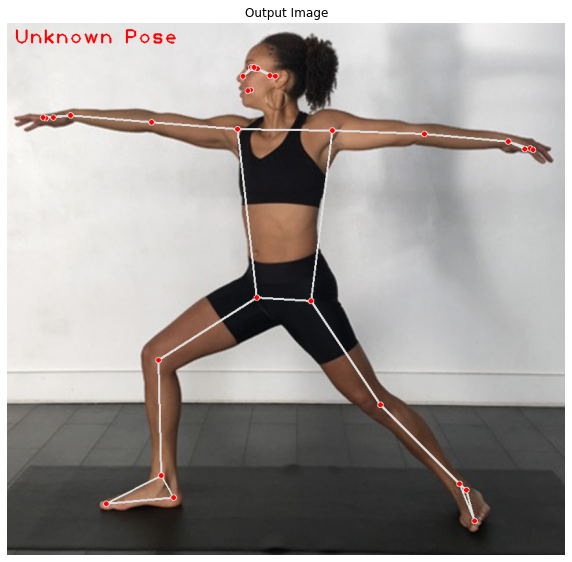

In [21]:
image
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

In [22]:
# accuracy rate

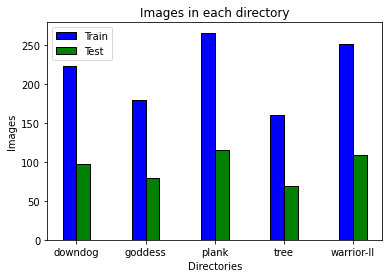

In [23]:
import numpy as np
import matplotlib.pyplot as plt

Women = [223,180,266,160,252]
Men = [97,80,115,69,109]

n=5
r = np.arange(n)
width = 0.20


plt.bar(r, Women, color = 'b',
		width = width, edgecolor = 'black',
		label='Train')
plt.bar(r + width, Men, color = 'g',
		width = width, edgecolor = 'black',
		label='Test')

plt.xlabel("Directories")
plt.ylabel("Images")
plt.title("Images in each directory")

# plt.grid(linestyle='--')
plt.xticks(r + width/2,['downdog','goddess','plank','tree','warrior-II'])
plt.legend()

plt.show()
